# Diabetes Exploratory Data Analysis

---------------
## Context
---------------

Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients are growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

A few years ago research was done on a tribe in America which is called the Pima tribe (also known as the Pima Indians). In this tribe, it was found that the ladies are prone to diabetes very early. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients were females at least 21 years old of Pima Indian heritage. 

-----------------
## Objective
-----------------

Here, we are analyzing different aspects of Diabetes in the Pima Indians tribe by doing Exploratory Data Analysis.

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: A function which scores likelihood of diabetes based on family history.
* Age: Age in years
* Outcome : Class variable (0: person is not diabetic or 1: person is diabetic)

### Import the necessary libraries 

In [4]:
import numpy as np # Library for numerical analysis and operations on numbers and arrays
import pandas as pd # Library for cleaning, manipulating and analysing data

import seaborn as sns # Library for data visualisations
import matplotlib.pyplot as plt # Library for data visualisations
%matplotlib inline # This ensures plots are dislayed in line in the Jupyter notebook

### Load data

In [5]:
pima = pd.read_csv("diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Check dimension of dataset
pima.shape

(768, 9)

The dimension of the dataset refers to the shape of the dataset which is a tuple containing 2 elements. The elements represent the the number of rows and the number of cloumns in the dataset respectively. Thus, the Pima dataset has 768 rows and 9 columns.

In [43]:
# check size of dataset
pima.size

6912

The size refers to the total number of data points or items in the dataset, in this case 6912.

In [5]:
# Inspect info of dataset to check data types and non-null values
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- We have two distinct data types in the data, float64 and int64
- There are two columns with the data type float64 and there are seven columns with the data type int64.
- There are no null values in the dataset and the data types seem ok for the various columns.

In [45]:
# check for missing values
pima.isnull().values.any()

False

Missing values refer to cells within the dataset that have no inputs or are blank.
The output of the above code returns a boolean which is True if there are blank cells in the data and False when there are no blank cells.
The result of our code(False) indicates that there are no missing values in the data.

In [7]:
# Check for number of unique observations
pima.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [15]:
# Check for duplicated rows in data
pima.duplicated().value_counts()

False    768
dtype: int64

The code above returns a boolean which is True if there are duplicated rows and False if there aren't any. We see from the output that we have 768 rows of unique data.

### Summary statistics of data 

In [6]:
# check summary statistics of all columns except the label column 'Outcome'
pima.iloc[:,0:8].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


#### We will look at the statistical measures for the variable Age.

1. The maximum and minimum ages in the data are 81 and 21 years respectively.
2. The average age is ~33 years
3. The median (50% percentile) age is 29 years



### Univariate Analysis

Let's check the distribution and outliers in each variable except 'Outcome'

Pregnancies
Skew : 0.9


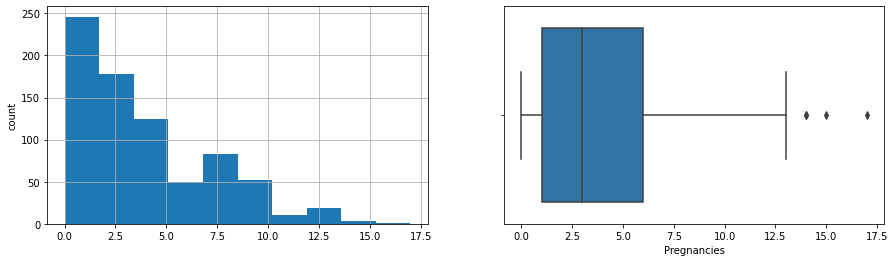

Glucose
Skew : 0.17


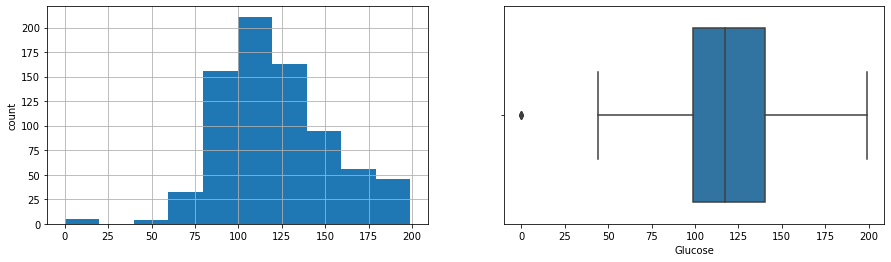

BloodPressure
Skew : -1.84


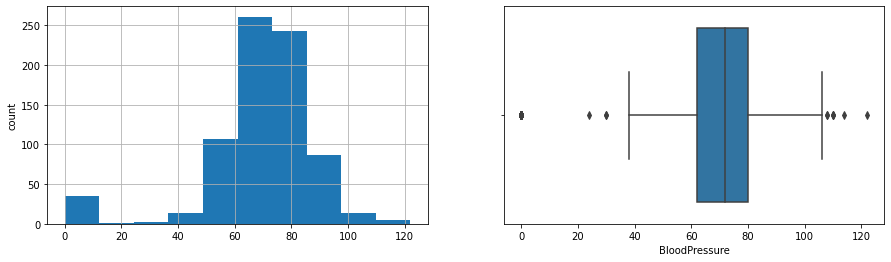

SkinThickness
Skew : 0.11


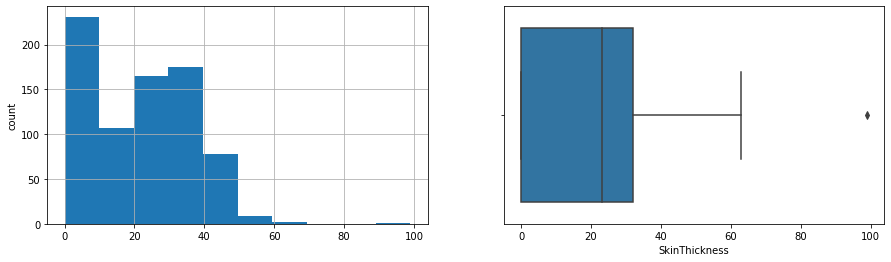

Insulin
Skew : 2.27


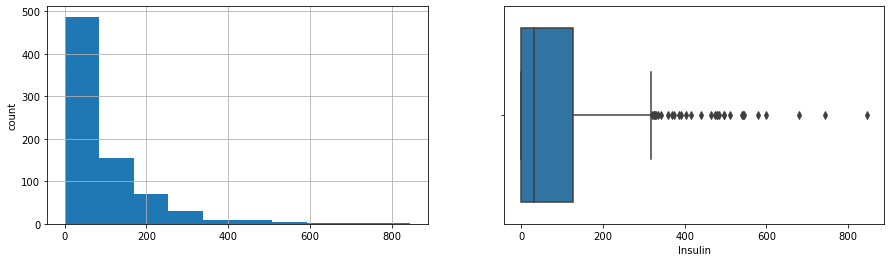

BMI
Skew : -0.43


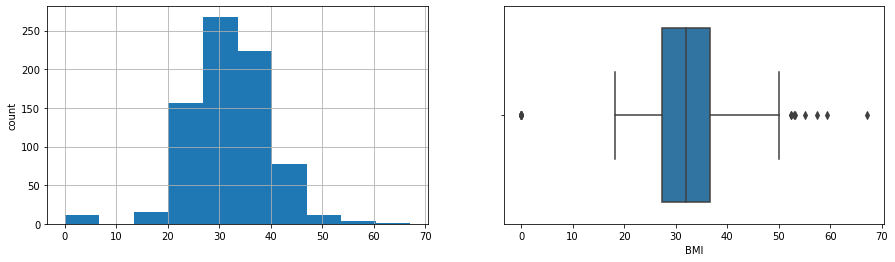

DiabetesPedigreeFunction
Skew : 1.92


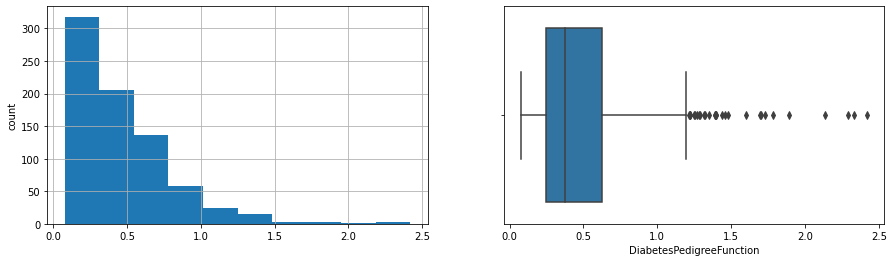

Age
Skew : 1.13


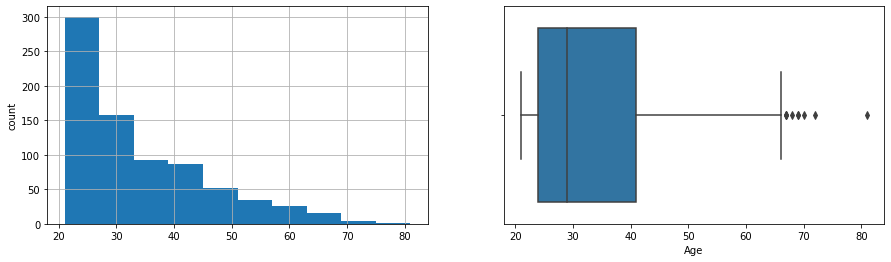

In [22]:
# Get variables
labels = pima.iloc[:,:8]

# Plot histograms and boxplots
for col in labels:
    print(col)
    print('Skew :',round(labels[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    labels[col].hist(bins=10, grid=True)
    plt.ylabel('count')
    plt.xvline()
    plt.subplot(1,2,2)
    sns.boxplot(x=labels[col])
    plt.show()

Most variables are right skewed except Glucose which is left skewed and BloodPressure and BMI which seem to be normally distributed. Also all the variables have outliers in them with BloodPressure, DiabetesPedigreeFunction, Insulin and Age having the most outliers.

In [57]:
# Find the interquartile range for  all variables
Q1 = pima.quantile(0.25)
Q3 = pima.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


- The IQR is used because it helps us to determine the variability of the values in the data especially in the middle half of our data.Boxplots can be used to visualise the IQR.

### Let's try and answer some questions that will help us understand our data more.

In [77]:
# Find BMI for person with highest Glucose
pima[pima['Glucose']==pima['Glucose'].max()]['BMI']

661    42.9
Name: BMI, dtype: float64

The 'BMI' for the person having the highest 'Glucose' is 42.9

In [14]:
# Find mean, median, and mode of 'BMI'
m1 = pima['BMI'].mean()  #Mean
print('Mean:{:.2f}'.format(m1))

m2 = pima['BMI'].median()  #Median
print('Median:{:.2f}'.format(m2))

m3 = pima['BMI'].mode()[0]  #Mode
print('Mode:{:.2f}'.format(m3))

Mean:31.99
Median:32.00
Mode:32.00


**Observations:**

- The three measures of central tendency are almost equal with the median and mode being exactly the same and the mean slightly different. 

- Since all three measures are almost the same, it indicates that the distribution may be a normal distribution.

In [50]:
# Find number of women with Glucoes level above the mean Glucose level
pima[pima['Glucose']>pima['Glucose'].mean()].shape[0]

349

There are 349 women whose Glucose level is above the mean.

In [17]:
# The number of women with BloodPressure equal to the median BloodPressure and BMI less than the median BMI
pima[(pima['BloodPressure']==pima['BloodPressure'].median()) & (pima['BMI']<pima['BMI'].median())].count()

Pregnancies                 22
Glucose                     22
BloodPressure               22
SkinThickness               22
Insulin                     22
BMI                         22
DiabetesPedigreeFunction    22
Age                         22
Outcome                     22
dtype: int64

There are 22 women whose Blood pressure is equal to the median Blood pressure and their BMI less than the median BMI.

### Bivariate Analysis

We will plot some visualisations to understand the relationships between pairs of variables.

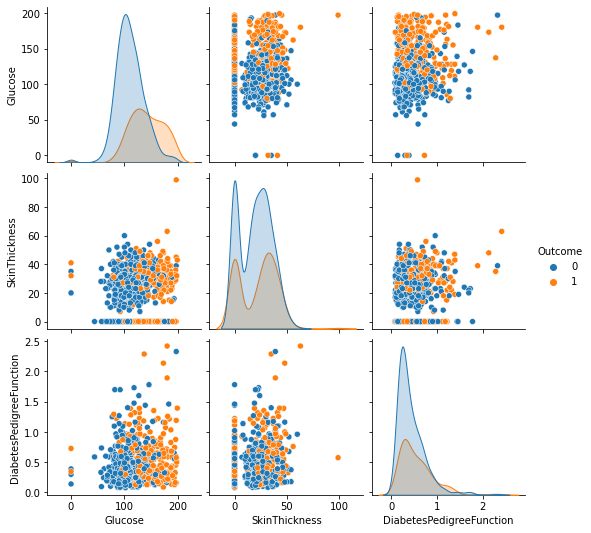

In [52]:
# Create the pairplot for variables 'Glucose', 'SkinThickness' and 'DiabetesPedigreeFunction'
sns.pairplot(data=pima,vars=['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue='Outcome')
plt.show()

#### Observations:

The diagonals of the plot shows the distribution of the individual variables. Here we see the following:

1. The distrubution of Glucose is symmetric among both diabetic and non-diabetic persons. For diabetic persons the distribuiton is bimodal with two peaks around 120 and 180 whiles that of non-diabetic persons is unimodal with a peak around 100.

2. The distribution of Skinthickness is both symmetric and bimodal among diabetic and non-diabetic persons. Both distributions are slightly right skewed.

3. The distribution of DiabetesPedigreeFunction is assymetric and right skewed for both diabetic and non-diabetic persons.

The densities of non-diabetic persons across all the variables are much higher than their diabetic counterparts. Also there doesn't seem to be much correlation among the variables except for the Glucose-DiabetesPedigreeFunction pair and the SkinThickness-DiabetesPedigreeFunction pair. These pairs seem to show a slight positive correlation.

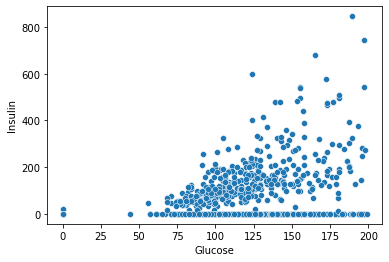

In [53]:
# Plot the scatterplot between 'Glucose' and 'Insulin'
sns.scatterplot(x='Glucose',y='Insulin',data=pima)
plt.show()

There seems to be some positive correlation between Insulin and Glucose.This makes sense as insulin is a hormone needed to move glucose to cells that need it.

#### Plot histograms for variable Age to understand the number of women in different Age groups given that they have diabetes or not.

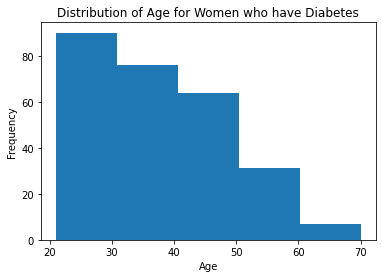

In [19]:
# Plot histogram of Age variable for women with diabetes
plt.hist(pima[pima['Outcome']==1]['Age'], bins = 5)
plt.title('Distribution of Age for Women who have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

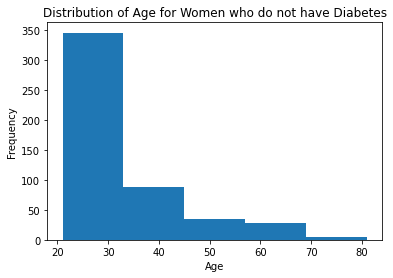

In [56]:
# Plot histogram of Age variable for women without diabetes
plt.hist(pima[pima['Outcome']==0]['Age'], bins = 5)
plt.title('Distribution of Age for Women who do not have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Observations:

From the plots we observe the following:

1. The distribution of Age for Women who have Diabetes is asymmetrical and slightly right skewed. This indicates that a majority of women who have diabetes ranges from 20 to 60 years.

2. The distribution of Age for Women who do not have Diabetes is also asymmetrical and right skewed. This indicates that a majority of women who do not have diabetes ranges from 20 to 30 years.

3. Both distributions have a majority of the women's ages ranging from 20 to 30 years. The number of Women who have diabetes in this category is smaller(around 90) compared to the number of women who do not have diabetes(around 349).



In [21]:
# Find and visualize the the correlation matrix
corr_matrix = pima.iloc[:,0:8].corr()

corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


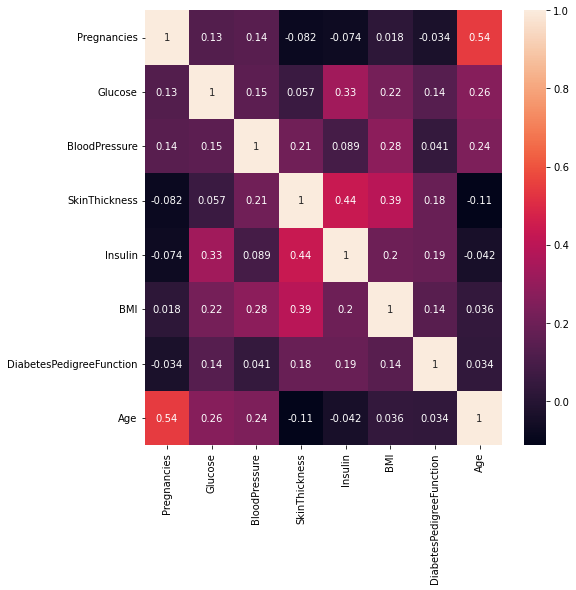

In [22]:
# Plot the correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()


1. Pregnancy is positively correlated with all variables except for Skinthickness, Insulin and DiabetePedigreeFunction which      are negatively correlated. This seems to suggest that as the number of preganancies increase,Glucose, BloodPressure, BMI and    Age also increase while Skinthickness, Insulin, and DiabetesPedigreeFunction decrease.

2. There is a relatively strong positive correlation between Age and pregnancy indicating that as patients grow older the          number of pregnancies increase. 

3. Insulin also has a relatively strong positive correlation with skinthickness but a weak one with Glucose,BloodPressure, BMI    and  DiabetesPedigreeFunction. 

4. Same with BMI which shows a relatively strong positive correlation with Skinthickness but a weak positive correlation with      all other variables.  

5. Age shows a negative correlation with skinthickness which is understandable because as one gets older, skinthickness            naturally decreases.